### Import Data And Require Packages 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
import warnings

In [5]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### preparing x and y variable 

In [6]:
x = df.drop(['math_score'],axis=1)
y = df['math_score']

#### create column transformer 

In [7]:
num = x.select_dtypes('number').columns
cat = x.select_dtypes('object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh = OneHotEncoder()
sc = StandardScaler()

ct = ColumnTransformer(
    [
        ('OneHotEncoder',oh,cat),
        ('StandardScaler',sc,num)
    ]

)

In [8]:
x = ct.fit_transform(x)

In [9]:
x.shape

(1000, 19)

### performing train test split 

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape , x_test.shape

((800, 19), (200, 19))

### Creating an Evaluate Function to give all metrics model Training 

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true , predicted)
    rmse = np.sqrt(mean_squared_error(true , predicted))
    r2score = r2_score(true , predicted)
    return mae,rmse,r2score

In [12]:
models = {
    'Linear_Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGRegressor':XGBRFRegressor(),
    'catboosting':CatBoostRegressor(verbose=False),
    'AdaBoost':AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance on Training set')
    print("-- RMSE: ",model_train_rmse)
    print("-- MAE: ",model_train_mae)
    print("-- R2 Score: ",model_train_r2)
    
    print(50*'-')
    
    print('Model performance on Testin set')
    print("-- RMSE: ",model_test_rmse)
    print("-- MAE: ",model_test_mae)
    print("-- R2 Score: ",model_test_r2)
    
    r2_list.append(model_test_r2)
    print(50*'=')
    print('\n')

Linear_Regression
Model performance on Training set
-- RMSE:  5.323050852720513
-- MAE:  4.266711846071957
-- R2 Score:  0.8743172040139593
--------------------------------------------------
Model performance on Testin set
-- RMSE:  5.393993869732845
-- MAE:  4.214763142474852
-- R2 Score:  0.8804332983749564


Lasso
Model performance on Training set
-- RMSE:  6.593815587795565
-- MAE:  5.206302661246526
-- R2 Score:  0.8071462015863458
--------------------------------------------------
Model performance on Testin set
-- RMSE:  6.51969453566742
-- MAE:  5.157881810347763
-- R2 Score:  0.8253197323627852


Ridge
Model performance on Training set
-- RMSE:  5.323324922741654
-- MAE:  4.2649878237259795
-- R2 Score:  0.8743042615212909
--------------------------------------------------
Model performance on Testin set
-- RMSE:  5.390387016935636
-- MAE:  4.211100688014259
-- R2 Score:  0.880593148502874


K-Neighbors
Model performance on Training set
-- RMSE:  5.709229370063879
-- MAE:  4.5

RandomForest
Model performance on Training set
-- RMSE:  2.285753952435911
-- MAE:  1.8236635416666667
-- R2 Score:  0.9768253298130598
--------------------------------------------------
Model performance on Testin set
-- RMSE:  6.059984842814286
-- MAE:  4.6797625
-- R2 Score:  0.849084993181763


XGRegressor
Model performance on Training set
-- RMSE:  4.716954377658802
-- MAE:  3.79393460392952
-- R2 Score:  0.901308907888719
--------------------------------------------------
Model performance on Testin set
-- RMSE:  5.781741484023623
-- MAE:  4.482239389419556
-- R2 Score:  0.8626253210012078


catboosting
Model performance on Training set
-- RMSE:  3.042664195326799
-- MAE:  2.405393926779502
-- R2 Score:  0.9589358676277713
--------------------------------------------------
Model performance on Testin set
-- RMSE:  6.008631956907363
-- MAE:  4.612531714976557
-- R2 Score:  0.8516318920747058


AdaBoost
Model performance on Training set
-- RMSE:  5.770326104345904
-- MAE:  4.740329

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear_Regression,0.880433
6,XGRegressor,0.862625
8,AdaBoost,0.854637
7,catboosting,0.851632
5,RandomForest,0.849085
1,Lasso,0.825320
3,K-Neighbors,0.783898
4,DecisionTree,0.733108


## Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.8804332983749564

#### Plotting y_pred and y_test

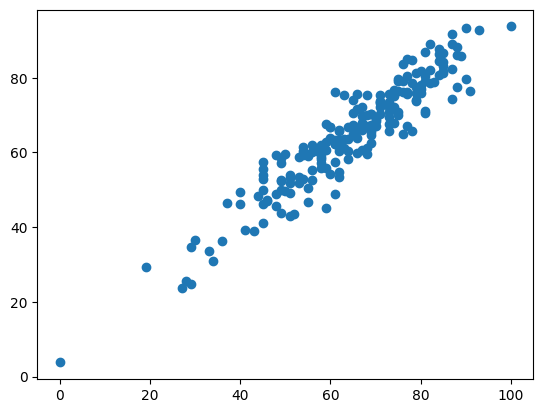

In [15]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

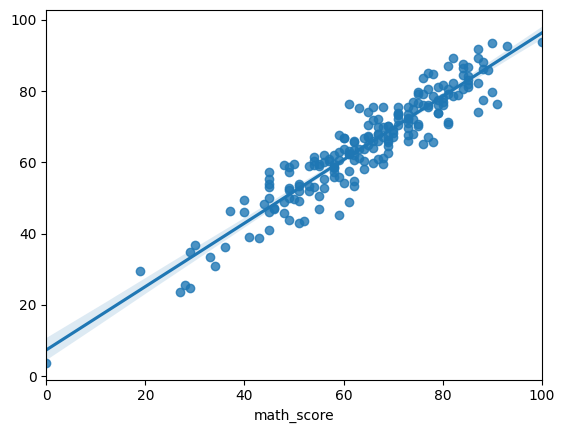

In [16]:
sns.regplot(x=y_test,y=y_pred)